![](image.jpg)


Dive into the heart of data science with a project that combines healthcare insights and predictive analytics. As a Data Scientist at a top Health Insurance company, you have the opportunity to predict customer healthcare costs using the power of machine learning. Your insights will help tailor services and guide customers in planning their healthcare expenses more effectively.

## Dataset Summary

Meet your primary tool: the `insurance.csv` dataset. Packed with information on health insurance customers, this dataset is your key to unlocking patterns in healthcare costs. Here's what you need to know about the data you'll be working with:

## insurance.csv
| Column    | Data Type | Description                                                      |
|-----------|-----------|------------------------------------------------------------------|
| `age`       | int       | Age of the primary beneficiary.                                  |
| `sex`       | object    | Gender of the insurance contractor (male or female).             |
| `bmi`       | float     | Body mass index, a key indicator of body fat based on height and weight. |
| `children`  | int       | Number of dependents covered by the insurance plan.              |
| `smoker`    | object    | Indicates whether the beneficiary smokes (yes or no).            |
| `region`    | object    | The beneficiary's residential area in the US, divided into four regions. |
| `charges`   | float     | Individual medical costs billed by health insurance.             |



A bit of data cleaning is key to ensure the dataset is ready for modeling. Once your model is built using the `insurance.csv` dataset, the next step is to apply it to the `validation_dataset.csv`. This new dataset, similar to your training data minus the `charges` column, tests your model's accuracy and real-world utility by predicting costs for new customers.

## Let's Get Started!

This project is your playground for applying data science in a meaningful way, offering insights that have real-world applications. Ready to explore the data and uncover insights that could revolutionize healthcare planning? Let's begin this exciting journey!

In [62]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Loading the insurance dataset
insurance_data_path = 'insurance.csv'
insurance = pd.read_csv(insurance_data_path)
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552


In [63]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1272 non-null   float64
 1   sex       1272 non-null   object 
 2   bmi       1272 non-null   float64
 3   children  1272 non-null   float64
 4   smoker    1272 non-null   object 
 5   region    1272 non-null   object 
 6   charges   1284 non-null   object 
dtypes: float64(3), object(4)
memory usage: 73.3+ KB


In [58]:
len(insurance)

1338

In [64]:
# Check for duplicate rows
duplicate_rows = insurance.duplicated()
num_duplicates = duplicate_rows.sum()

# Remove duplicate rows if any
if num_duplicates > 0:
    insurance = insurance.drop_duplicates()

# Display the number of duplicates found and the updated dataframe
num_duplicates, insurance.head()

(1,
     age     sex     bmi  children smoker     region       charges
 0  19.0  female  27.900       0.0    yes  southwest     16884.924
 1  18.0    male  33.770       1.0     no  Southeast     1725.5523
 2  28.0    male  33.000       3.0     no  southeast     $4449.462
 3  33.0    male  22.705       0.0     no  northwest  $21984.47061
 4  32.0    male  28.880       0.0     no  northwest    $3866.8552)

In [65]:
# Display all distinct values in columns 'region' and 'sex'
distinct_regions = insurance['region'].unique()
distinct_sex = insurance['sex'].unique()
distinct_smoker = insurance['smoker'].unique()


distinct_regions, distinct_sex, distinct_smoker

(array(['southwest', 'Southeast', 'southeast', 'northwest', 'Northwest',
        'Northeast', 'northeast', 'Southwest', nan], dtype=object),
 array(['female', 'male', 'woman', 'F', 'man', nan, 'M'], dtype=object),
 array(['yes', 'no', nan], dtype=object))

In [68]:
# Remove $ in column 'charges' and convert to float
insurance['charges'] = insurance['charges'].replace('[\$,]', '', regex=True).astype(float)

# Convert 'smoker' column to binary
# insurance['smoker'] = insurance['smoker'].map({'yes': 1, 'no': 0})

# Clean values in 'sex' column 
insurance['sex'] = insurance['sex'].map(
    {
        'F':'female',
        'M':'male',
        'woman':'female',
        'man':'male'
    })

# Capitalize first letter of values in 'region' column
insurance['region'] = insurance['region'].str.lower()


insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520


In [69]:
insurance.isnull().sum()

age          65
sex         191
bmi          65
children     65
smoker       65
region       65
charges      65
dtype: int64

In [70]:
insurance = insurance.dropna(subset=['age', 'sex','bmi', 'children', 'smoker', 'region', 'charges'])
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520


In [77]:
# Clean negative values for age and number of children to positive

# # # insurance['age'] = insurance['age'].abs().astype(int)
insurance = insurance[insurance['age']>0]
insurance['age'] = insurance['age'].astype(int)

# # # insurance['children'] = insurance['children'].abs().astype(int)
insurance.loc[insurance['children'] < 0, 'children'] = 0
insurance['children'] = insurance['children'].astype(int)

# # insurance['smoker'] = insurance['smoker'].astype(int)

In [78]:
print(len(insurance))
print(insurance.head())

1038
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [79]:
insurance.describe()

,age,bmi,children,charges
count,1038.000000,1038.000000,1038.000000,1038.000000
mean,39.260116,30.581084,1.032755,13295.924794
std,14.153238,6.110203,1.195817,12173.996178
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4828.586213
50%,39.000000,30.230000,1.000000,9400.540650
75%,51.000000,34.560000,2.000000,16107.760250
max,64.000000,53.130000,5.000000,63770.428010


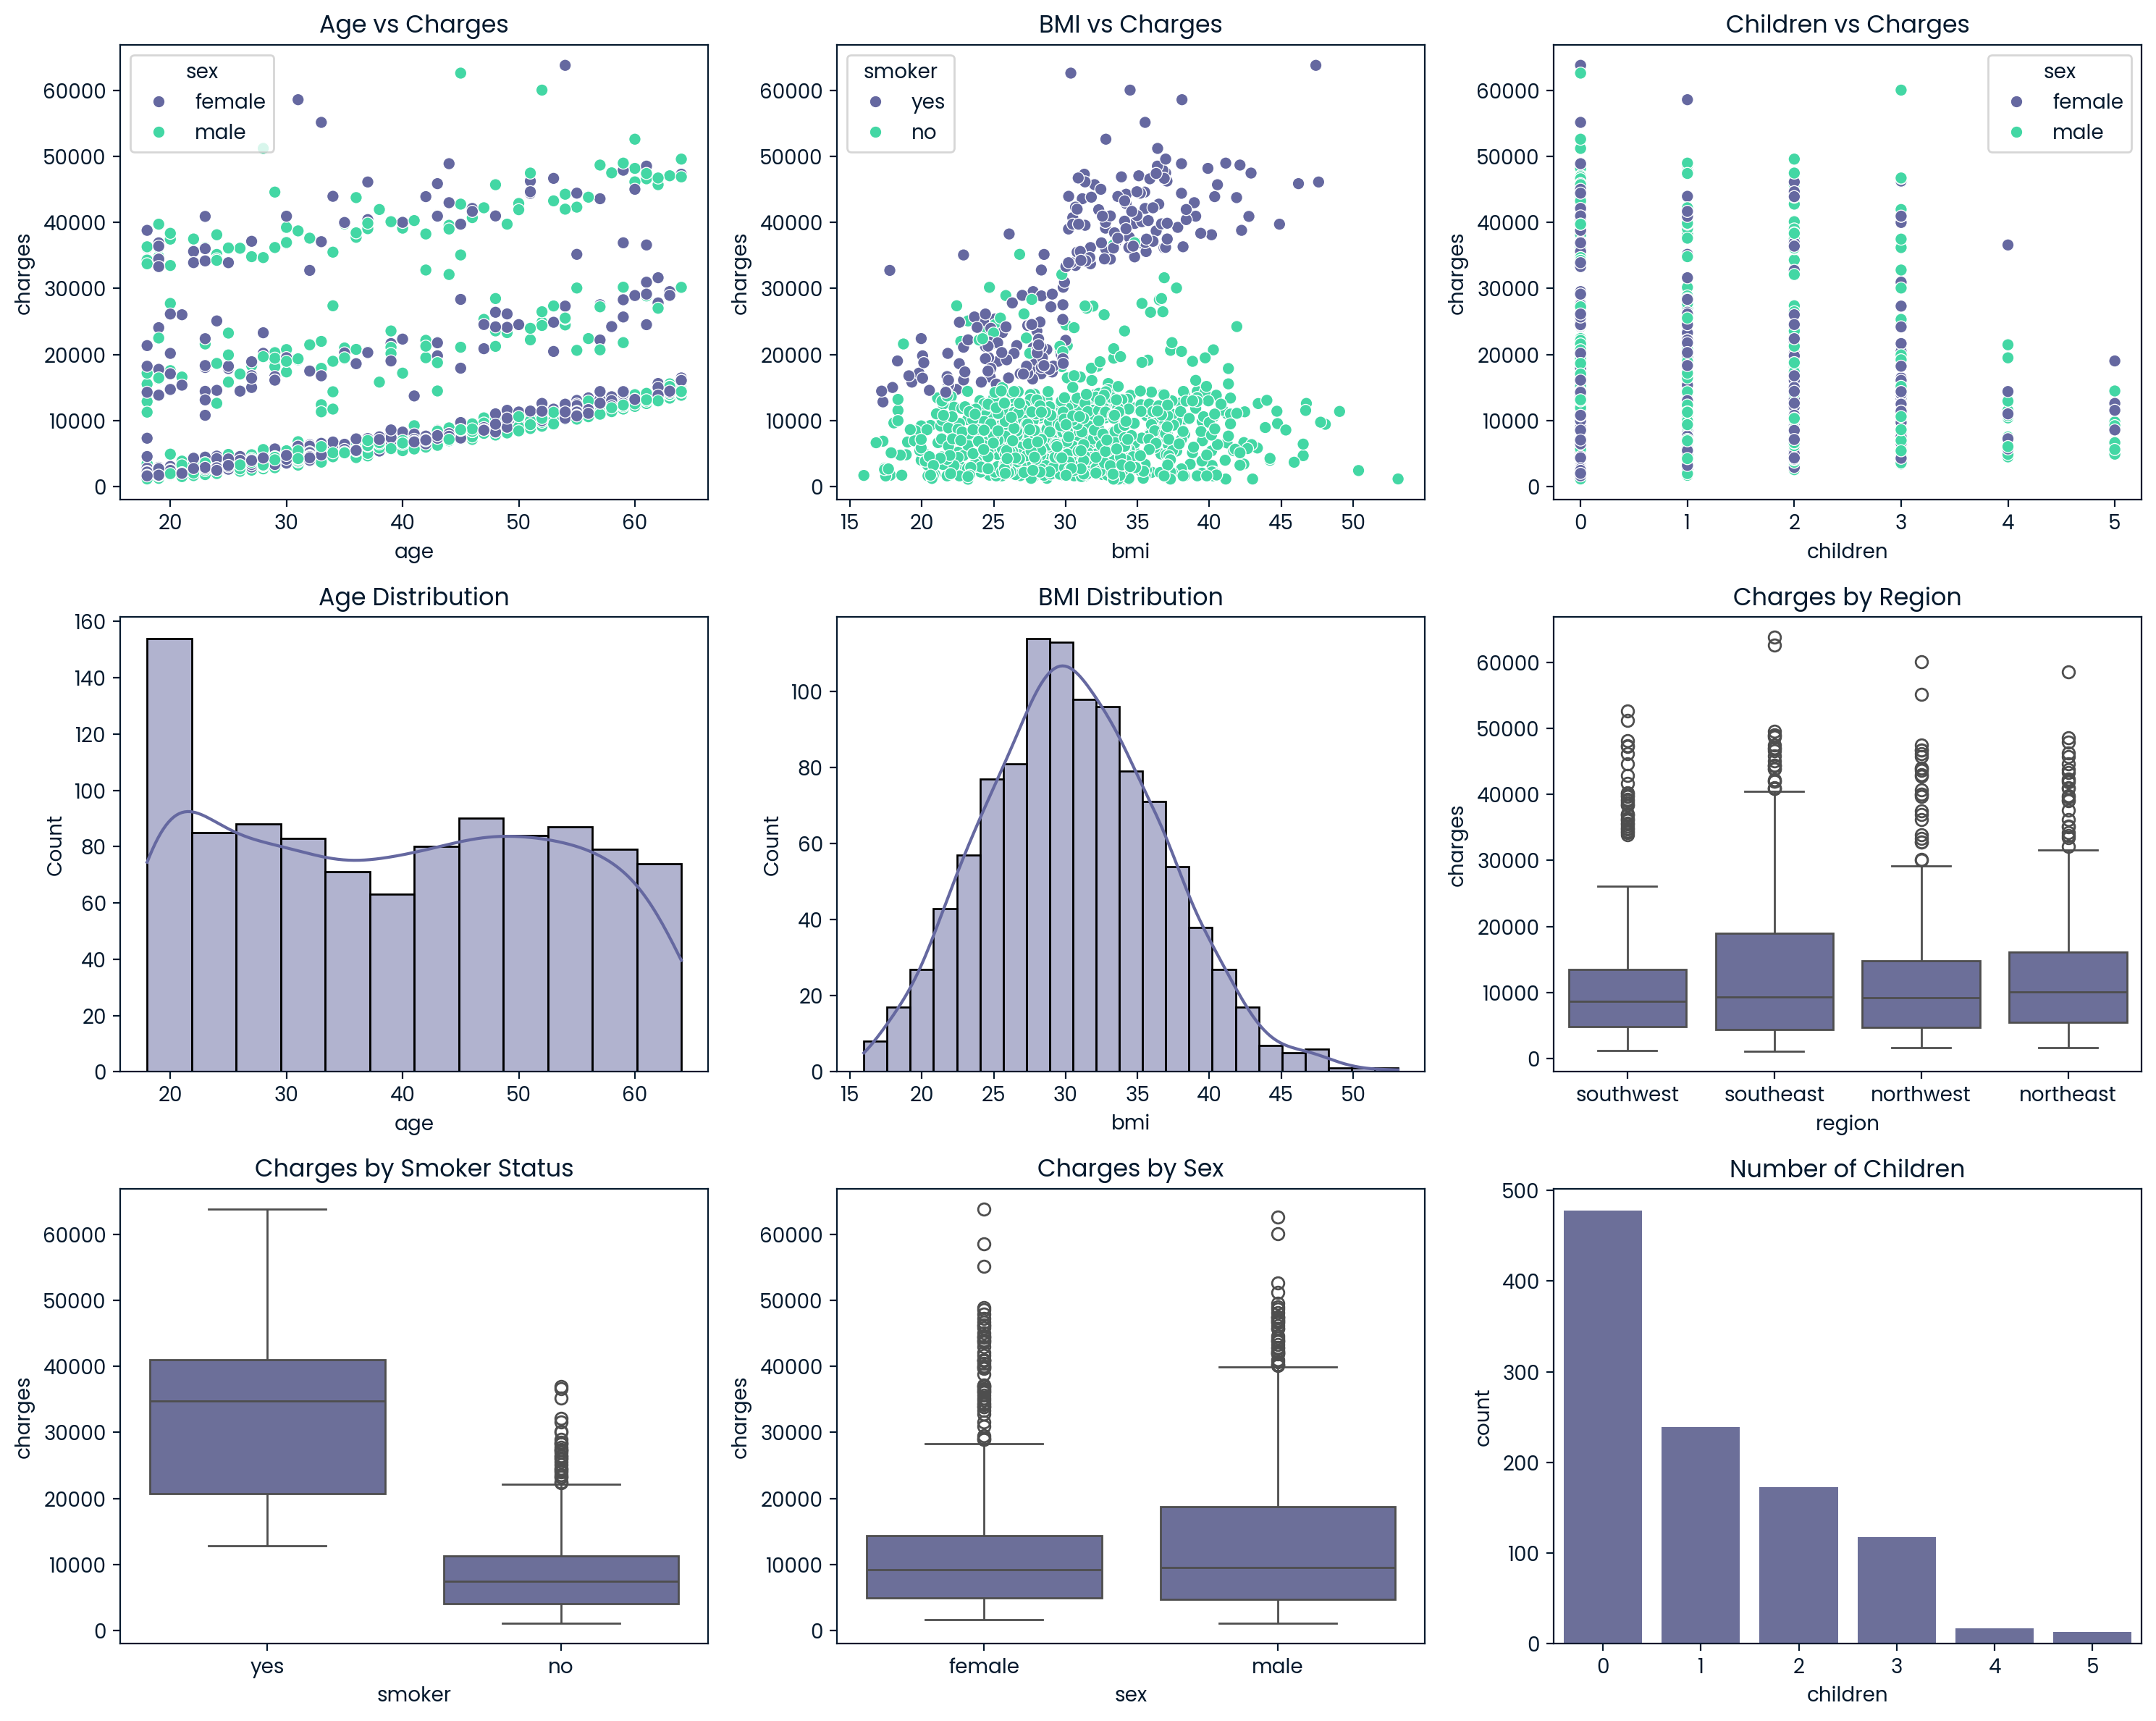

In [81]:
import seaborn as sns

# Set the figure size and subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

# Plot 1: Age vs Charges
sns.scatterplot(data=insurance, x='age', y='charges', hue='sex', ax=axes[0, 0])
axes[0, 0].set_title('Age vs Charges')

# Plot 2: BMI vs Charges
sns.scatterplot(data=insurance, x='bmi', y='charges', hue='smoker', ax=axes[0, 1])
axes[0, 1].set_title('BMI vs Charges')

# Plot 3: Children vs Charges
sns.scatterplot(data=insurance, x='children', y='charges', hue='sex', ax=axes[0, 2])
axes[0, 2].set_title('Children vs Charges')

# Plot 4: Distribution of Age
sns.histplot(insurance['age'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Age Distribution')

# Plot 5: Distribution of BMI
sns.histplot(insurance['bmi'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('BMI Distribution')

# Plot 6: Charges by Region
sns.boxplot(data=insurance, x='region', y='charges', ax=axes[1, 2])
axes[1, 2].set_title('Charges by Region')

# Plot 7: Charges by Smoker Status
sns.boxplot(data=insurance, x='smoker', y='charges', ax=axes[2, 0])
axes[2, 0].set_title('Charges by Smoker Status')

# Plot 8: Charges by Sex
sns.boxplot(data=insurance, x='sex', y='charges', ax=axes[2, 1])
axes[2, 1].set_title('Charges by Sex')

# Plot 9: Number of Children Count
sns.countplot(data=insurance, x='children', ax=axes[2, 2])
axes[2, 2].set_title('Number of Children')

# Adjust layout
plt.tight_layout()
plt.show()

## Model Development


In [82]:
cat_columns = ['sex', 'smoker', 'region']
num_columns = ['age','bmi','children']
target = 'charges'

In [118]:
# Encode categorical columns using pd.get_dummies

insurance_encoded = pd.get_dummies(insurance, columns=cat_columns, drop_first=True)  

In [119]:
cat_columns_encoded.shape

(1038, 12)

In [120]:
cat_columns_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1038 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1038 non-null   int64  
 1   bmi               1038 non-null   float64
 2   children          1038 non-null   int64  
 3   charges           1038 non-null   float64
 4   sex_female        1038 non-null   uint8  
 5   sex_male          1038 non-null   uint8  
 6   smoker_no         1038 non-null   uint8  
 7   smoker_yes        1038 non-null   uint8  
 8   region_northeast  1038 non-null   uint8  
 9   region_northwest  1038 non-null   uint8  
 10  region_southeast  1038 non-null   uint8  
 11  region_southwest  1038 non-null   uint8  
dtypes: float64(2), int64(2), uint8(8)
memory usage: 80.9 KB


In [121]:
# Scale numerical columns using standard scaler
scaler = StandardScaler()
insurance_encoded[num_columns] = scaler.fit_transform(insurance[num_columns])



In [123]:
insurance_encoded.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.432173,-0.439000,-0.864057,16884.92400,0,1,0,0,1
1,-1.502862,0.522152,-0.027405,1725.55230,1,0,0,1,0
2,-0.795969,0.396072,1.645899,4449.46200,1,0,0,1,0
3,-0.442523,-1.289627,-0.864057,21984.47061,1,0,1,0,0
4,-0.513212,-0.278535,-0.864057,3866.85520,1,0,1,0,0


In [124]:
# Define X and y
X = insurance_encoded.drop(columns=[target])
y = insurance[target]

In [132]:
from sklearn.linear_model import LinearRegression

# Initialize and fit the model on the training data
insurance_model = LinearRegression()
insurance_model.fit(X, y)

# Perform cross-validation using R² as the scoring metric
r2_scores = cross_val_score(insurance_model, X, y, cv=5, scoring='r2')

# Calculate the mean R² score from the cross-validation results
mean_r2_score = np.mean(r2_scores)

In [133]:
print("R² scores for each fold:", r2_scores)
print("Mean R² score:", mean_r2_score)
r2_score = mean_r2_score

R² scores for each fold: [0.73331501 0.72132597 0.82660214 0.71621466 0.75473756]
Mean R² score: 0.7504390696540023


## Making predictions for new data

In [142]:
validation_data = pd.read_csv('validation_dataset.csv')
validation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       50 non-null     float64
 1   sex       50 non-null     object 
 2   bmi       50 non-null     float64
 3   children  50 non-null     float64
 4   smoker    50 non-null     object 
 5   region    50 non-null     object 
dtypes: float64(3), object(3)
memory usage: 2.5+ KB


In [143]:
validation_data.head()

,age,sex,bmi,children,smoker,region
0,18.0,female,24.090000,1.0,no,southeast
1,39.0,male,26.410000,0.0,yes,northeast
2,27.0,male,29.150000,0.0,yes,southeast
3,71.0,male,65.502135,13.0,yes,southeast
4,28.0,male,38.060000,0.0,no,southeast


In [144]:
# Display all distinct values in columns 'region' and 'sex'
val_regions = validation_data['region'].unique()
val_sex = validation_data['sex'].unique()
val_smoker = validation_data['smoker'].unique()

val_regions, val_sex, val_smoker

(array(['southeast', 'northeast', 'northwest', 'southwest'], dtype=object),
 array(['female', 'male'], dtype=object),
 array(['no', 'yes'], dtype=object))

In [145]:
validation_data_encoded = pd.get_dummies(validation_data, columns=cat_columns, drop_first=True)

In [146]:
validation_data_encoded[num_columns] = scaler.fit_transform(validation_data[num_columns])

In [147]:
validation_data_encoded.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.342765,-0.880452,-0.446515,0,0,0,1,0
1,-0.364345,-0.748241,-0.697366,1,1,0,0,0
2,-0.923442,-0.592095,-0.697366,1,1,0,1,0
3,1.126581,1.479524,2.563699,1,1,0,1,0
4,-0.876851,-0.084336,-0.697366,1,0,0,1,0


In [148]:
# Ensure the validation data has the same columns as the training data
# Add any missing columns in validation_data_encoded, or remove extra columns
missing_cols = set(X.columns) - set(validation_data_encoded.columns)
for col in missing_cols:
    validation_data_encoded[col] = 0

In [149]:
# Ensure the column order matches between training data (X) and validation data
validation_data_encoded = validation_data_encoded[X.columns]


In [150]:
# Make predictions using the trained model
predicted_charges = insurance_model.predict(validation_data_encoded)

# Save predictions in the validation_data DataFrame
validation_data['predicted_charges'] = predicted_charges

In [151]:
# Ensure minimum charge values are realistic
validation_data.loc[validation_data['predicted_charges'] < 1000, 'predicted_charges'] = 1000

In [153]:
min(validation_data['predicted_charges']), max(validation_data['predicted_charges'])

(1000.0, 45861.55092513878)

In [155]:
# Step 10: Save the results to a new CSV file
# validation_data.to_csv('validation_data_with_predictions.csv', index=False)

# Print the updated validation data with predictions and the R² score
# print(validation_data[['predicted_charges']])
# print("Saved R² score:", r2_score)

Saved R² score: 0.7504390696540023
